<a href="https://www.kaggle.com/code/pavankumar20/temperature-forecasting-analysis-part2?scriptVersionId=98722242" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/smart-homes-temperature-time-series-forecasting/sample_submission.csv
/kaggle/input/smart-homes-temperature-time-series-forecasting/Solar house sensors and actuators map.png
/kaggle/input/smart-homes-temperature-time-series-forecasting/train.csv
/kaggle/input/smart-homes-temperature-time-series-forecasting/test.csv


In [2]:
train=pd.read_csv('/kaggle/input/smart-homes-temperature-time-series-forecasting/train.csv')
test=pd.read_csv('/kaggle/input/smart-homes-temperature-time-series-forecasting/test.csv')

In [3]:
total_data=pd.concat([train.drop(['Indoor_temperature_room'],axis=1),test],ignore_index=True)

# Importing Libraries

In [4]:
import pandas as pd
import numpy as np

In [5]:
import seaborn as sns
import plotly.express as px
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import OneHotEncoder
from catboost import CatBoostClassifier
from sklearn.metrics import mean_squared_error
import warnings
warnings.filterwarnings('ignore')

# Data Analysis

In [6]:
total_data.head()

,Id,Date,Time,CO2_(dinning-room),CO2_room,Relative_humidity_(dinning-room),Relative_humidity_room,Lighting_(dinning-room),Lighting_room,Meteo_Rain,Meteo_Sun_dusk,Meteo_Wind,Meteo_Sun_light_in_west_facade,Meteo_Sun_light_in_east_facade,Meteo_Sun_light_in_south_facade,Meteo_Sun_irradiance,Outdoor_relative_humidity_Sensor,Day_of_the_week
0,0,13/03/2012,11:45,216.560,221.920,39.9125,42.4150,81.6650,113.520,0.0,623.360,1.42625,9690.24,12604.20,95436.8,758.880,48.3750,2.0
1,1,13/03/2012,12:00,219.947,220.363,39.9267,42.2453,81.7413,113.605,0.0,623.211,1.59200,11022.00,10787.20,95436.8,762.069,47.8080,2.0
2,2,13/03/2012,12:15,219.403,218.933,39.7720,42.2267,81.4240,113.600,0.0,622.656,1.89133,13960.50,9669.63,95398.6,766.251,47.4320,2.0
3,3,13/03/2012,12:30,218.613,217.045,39.7760,42.0987,81.5013,113.344,0.0,622.571,1.82800,18511.20,9648.13,95360.3,766.037,47.0240,2.0
4,4,13/03/2012,12:45,217.714,216.080,39.7757,42.0686,81.4657,113.034,0.0,622.400,2.36071,26349.00,9208.32,95354.9,762.743,45.4743,2.0


Observations:

> Time variable- values are noted for every 15minutes(can be changed into range of values).

> From observed 5 values, the Indoor_temperature_room increases with time(without zig-zag pattern).

> Time components are Date, Time, Day_of_the_week.

In [7]:
total_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4137 entries, 0 to 4136
Data columns (total 18 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   Id                                4137 non-null   int64  
 1   Date                              4137 non-null   object 
 2   Time                              4137 non-null   object 
 3   CO2_(dinning-room)                4137 non-null   float64
 4   CO2_room                          4137 non-null   float64
 5   Relative_humidity_(dinning-room)  4137 non-null   float64
 6   Relative_humidity_room            4137 non-null   float64
 7   Lighting_(dinning-room)           4137 non-null   float64
 8   Lighting_room                     4137 non-null   float64
 9   Meteo_Rain                        4137 non-null   float64
 10  Meteo_Sun_dusk                    4137 non-null   float64
 11  Meteo_Wind                        4137 non-null   float64
 12  Meteo_

In [8]:
total_data.describe()

,Id,CO2_(dinning-room),CO2_room,Relative_humidity_(dinning-room),Relative_humidity_room,Lighting_(dinning-room),Lighting_room,Meteo_Rain,Meteo_Sun_dusk,Meteo_Wind,Meteo_Sun_light_in_west_facade,Meteo_Sun_light_in_east_facade,Meteo_Sun_light_in_south_facade,Meteo_Sun_irradiance,Outdoor_relative_humidity_Sensor,Day_of_the_week
count,4137.000000,4137.000000,4137.000000,4137.000000,4137.000000,4137.000000,4137.000000,4137.000000,4137.000000,4137.000000,4137.000000,4137.000000,4137.000000,4137.000000,4137.000000,4137.000000
mean,2068.000000,206.599835,209.611623,42.389879,44.546069,28.970248,42.335496,0.038756,335.094312,1.304623,14749.149509,13566.284958,19857.184071,232.203649,53.251632,3.962549
std,1194.393361,22.763114,24.183477,7.215405,8.297436,25.684356,42.602571,0.187128,304.513038,1.223829,25306.450482,23311.852941,29494.598354,312.460713,13.511063,1.988923
min,0.000000,187.339000,188.907000,26.173300,27.256000,10.740000,11.328000,0.000000,0.606667,0.000000,0.000000,0.000000,0.000000,-4.164670,22.246700,1.000000
25%,1034.000000,200.228000,201.707000,36.088000,38.446700,11.540700,13.509300,0.000000,0.650000,0.168667,0.000000,0.000000,0.000000,-3.250670,42.650700,2.000000
50%,2068.000000,205.131000,208.907000,42.776000,44.802700,14.126700,22.085300,0.000000,612.821000,0.962667,752.640000,1025.020000,645.120000,11.246000,54.717300,4.000000
75%,3102.000000,210.016000,212.331000,47.584000,50.301300,40.034700,55.064000,0.000000,619.712000,2.225330,14627.500000,12907.200000,33263.600000,479.552000,63.128000,6.000000
max,4136.000000,594.389000,609.237000,60.957300,62.594700,111.797000,162.965000,1.000000,625.003000,6.321330,95278.400000,92367.500000,95704.400000,1094.660000,83.805300,7.000000


In [9]:
#No nan values in the dataset.
total_data.isnull().sum()

Id                                  0
Date                                0
Time                                0
CO2_(dinning-room)                  0
CO2_room                            0
Relative_humidity_(dinning-room)    0
Relative_humidity_room              0
Lighting_(dinning-room)             0
Lighting_room                       0
Meteo_Rain                          0
Meteo_Sun_dusk                      0
Meteo_Wind                          0
Meteo_Sun_light_in_west_facade      0
Meteo_Sun_light_in_east_facade      0
Meteo_Sun_light_in_south_facade     0
Meteo_Sun_irradiance                0
Outdoor_relative_humidity_Sensor    0
Day_of_the_week                     0
dtype: int64

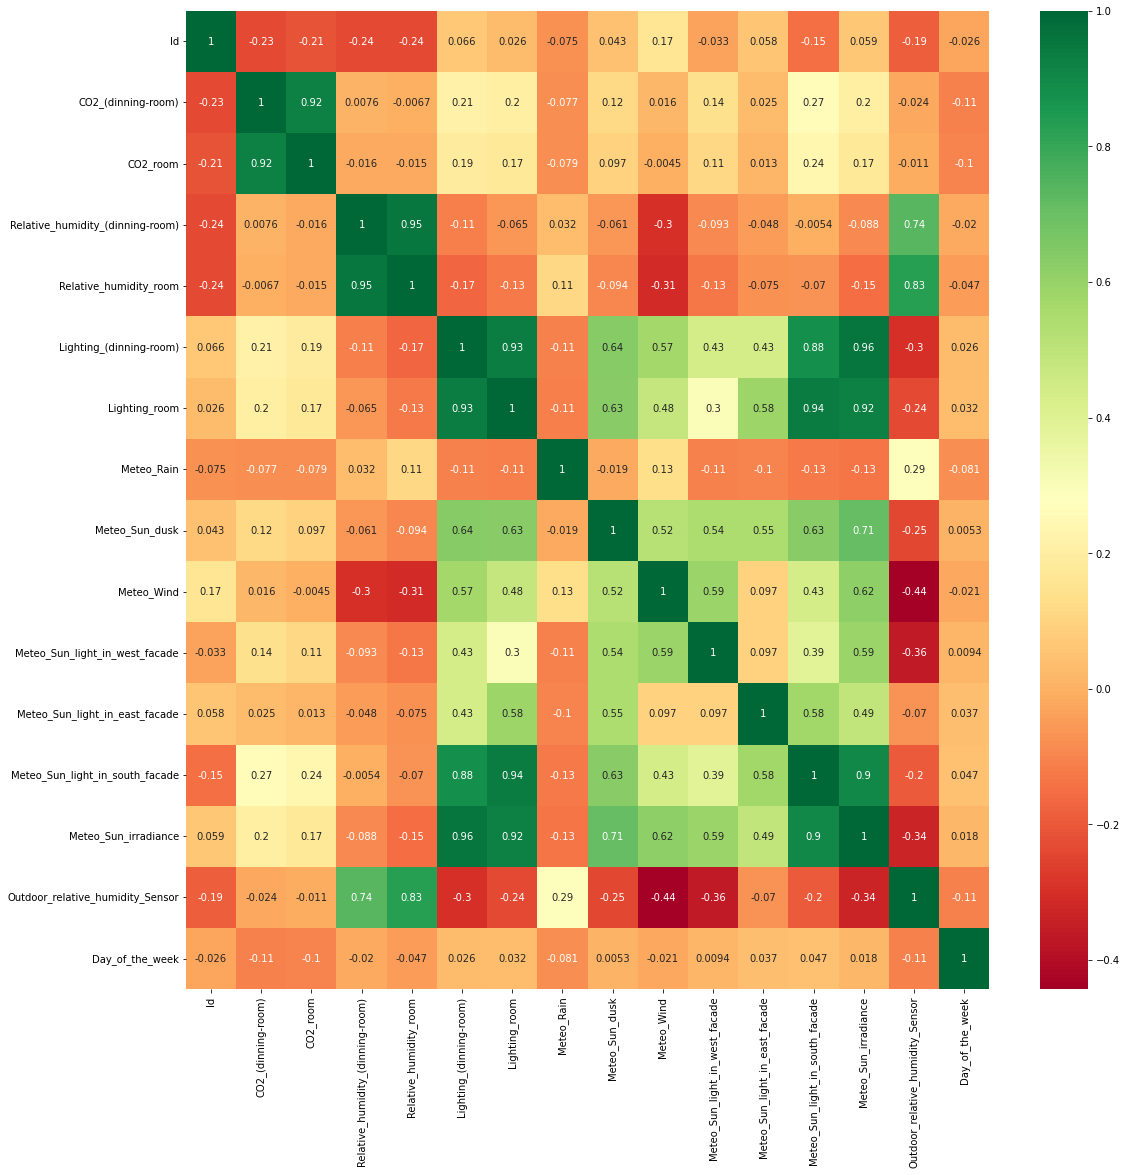

In [10]:
plt.figure(figsize = (18,18))
sns.heatmap(total_data.corr(), annot = True, cmap = "RdYlGn")
plt.show()

> Some of the variables are highly correlated with each other(Ex:-CO2_(dinning-room),CO2_room), which leads to multicollinearity.

1. Remove some of the highly correlated independent variables.
2. Linearly combine the independent variables, such as adding them together.
3. Perform an analysis designed for highly correlated variables, such as principal components analysis or partial least squares regression.
4. LASSO and Ridge regression are advanced forms of regression analysis that can handle multicollinearity. If you know how to perform linear least squares regression, you’ll be able to handle these analyses with just a little additional study.

https://statisticsbyjim.com/regression/multicollinearity-in-regression-analysis/

From the Graph

> Output has high correlation between variables Relavtive_humidity_room,Meteo_Sun_light_in_west_facade, Outdoor_relative_humidity_Sensor.

> Least correlation with Lighting_room,Meteo_Sun_light_in_south_facade

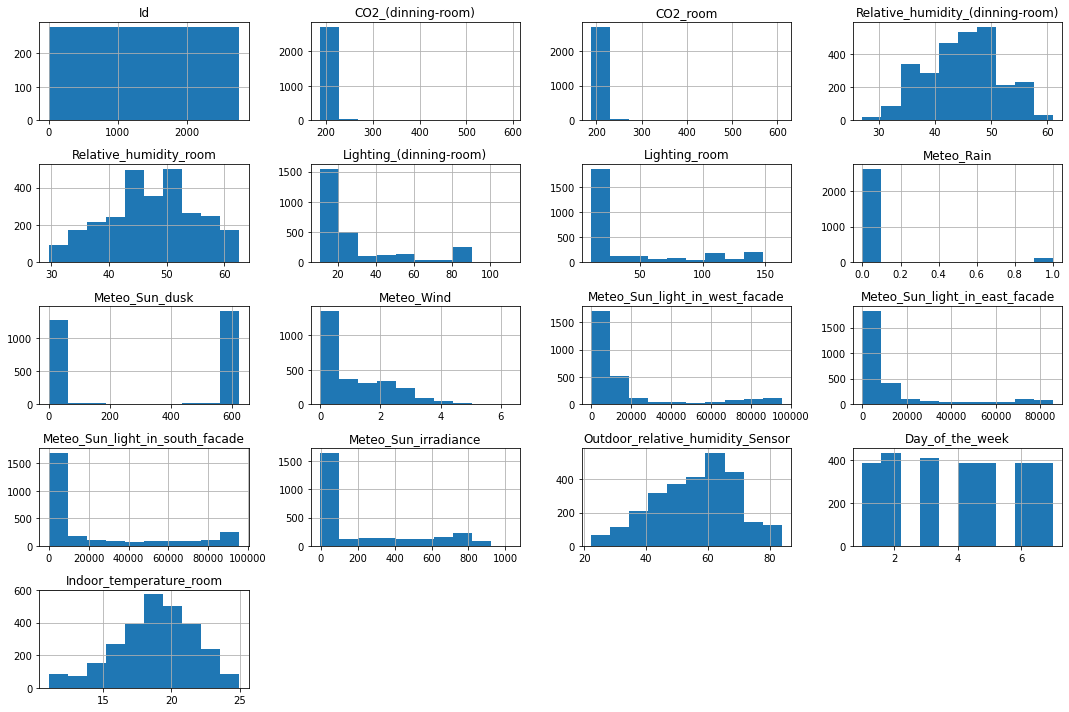

In [11]:
train.hist(bins=10, figsize=(15, 10))
plt.tight_layout()

>  Relative_humidity_(dinning room) and Outdoor_relative_humidity_Sensor are left skewed(so can apply log function)

<a id="title-three"></a>
<h1 style='background:#9AB0BD; border:4;height:40px; border-radius: 30px; color:black'><center>Basic Prediction- before feature Engineering
</center></h1> 

In [12]:
X=train.drop(['Indoor_temperature_room','Id','Date','Time'],axis=1)
Y=train['Indoor_temperature_room']
x_train, x_val, y_train, y_val = train_test_split(X, Y, test_size=0.2, random_state=40)

In [13]:
from sklearn.linear_model import LinearRegression
lnr=LinearRegression(normalize=True,)
lnr.fit(x_train,y_train)
y_pred=lnr.predict(x_train)
print("Basic model prediction accuracy=",mean_squared_error(y_pred,y_train))

Basic model prediction accuracy= 3.5880482144018337


In [14]:
y_pred=lnr.predict(x_val)
print("Basic model prediction accuracy=",mean_squared_error(y_pred,y_val))

Basic model prediction accuracy= 3.6408148676784324


<a id="title-four"></a>
<h1 style='background:#9AB0BD; border:4;height:40px; border-radius: 30px; color:black'><center>Feature Eng and analysis</center></h1> 

In [15]:
total_data['Date']=pd.to_datetime(total_data['Date'],format="%d/%m/%Y")
total_data['Day']=total_data['Date'].dt.dayofyear.astype(float)
total_data['Time']=pd.DatetimeIndex(total_data['Time'])
total_data['Hour']=total_data['Time'].apply(lambda x: x.hour).astype(int)
total_data['Minutes']=total_data['Time'].apply(lambda x: x.minute).astype(int)
total_data['Day_of_the_week']=total_data['Day_of_the_week'].astype(int)

In [16]:
train_data=pd.merge(total_data,train[['Id','Indoor_temperature_room']],on='Id')

Idea credits:
https://www.kaggle.com/code/gehallak/temperature-variations

* diff_temperature is highly correlated with Meteo_sun_irradiance, so we can predict diff_temperature from that

* To check if data is stationary or not
* https://www.geeksforgeeks.org/how-to-check-if-time-series-data-is-stationary-with-python/
* This test is essential to know whether the univariate data follows the trend.It determines how strongly, a univariate time series data follows a trend.The test results are interpreted with a p-value if p > 0.05 fails to reject the null hypothesis, else if p <= 0.05 reject the null hypothesis.

* Ho (Null Hypothesis): The time series data is non-stationary
* H1 (alternate Hypothesis): The time series data is stationary

In [17]:
from statsmodels.tsa.stattools import adfuller
res = adfuller(train_data['Indoor_temperature_room'])
 
# Printing the statistical result of the adfuller test
print('Augmneted Dickey_fuller Statistic: %f' % res[0])
print('p-value: %f' % res[1])
 
# printing the critical values at different alpha levels.
print('critical values at different levels:')
for k, v in res[4].items():
    print('\t%s: %.3f' % (k, v))

Augmneted Dickey_fuller Statistic: -5.750770
p-value: 0.000001
critical values at different levels:
	1%: -3.433
	5%: -2.863
	10%: -2.567


<a id="title-five"></a>
<h1 style='background:#9AB0BD; border:4;height:40px; border-radius: 30px; color:black'><center>Removing some rows</center></h1> 

In [18]:
#total_data=total_data.query("Day!=73")
total_data2=total_data.copy()

In [19]:
total_data=total_data2
train_data=pd.merge(total_data,train[['Id','Indoor_temperature_room']],on='Id')

In [20]:
val_data=train_data.query("Day>=98")
train_data=train_data.query("Day<98")

In [21]:
predictor_columns=['Meteo_Sun_irradiance','Hour','Outdoor_relative_humidity_Sensor','Meteo_Rain','Indoor_temperature_room']
train_data=train_data[predictor_columns]
train_data2=train_data.copy()
val_data=val_data[predictor_columns]

In [22]:
#train_data['Hour']=train_data['Hour'].astype(str)

In [23]:
#from sklearn.preprocessing import OneHotEncoder
#ohe=OneHotEncoder(sparse=False)
#hour_data=ohe.fit_transform(np.array(train_data['Hour']).reshape(-1,1))

In [24]:
#hourpd=pd.DataFrame(hour_data,columns=ohe.get_feature_names())
#train_data=pd.concat([train_data,hourpd],axis=1)

In [25]:
#train_data=train_data.drop(['Hour'],axis=1)
#train_data2=train_data.copy()

In [26]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
train_data=scaler.fit_transform(train_data)
val_data=scaler.transform(val_data)

In [27]:
def create_dataset(X,Y, time_stamps,horizon):
    dataX, dataY = [], []
    for i in range(len(X) - horizon-time_stamps):
        a = X[i:(i + time_stamps)]
        dataX.append(a)
        dataY.append(Y[i+time_stamps: i+time_stamps+ horizon])
    return np.array(dataX), np.array(dataY)

In [28]:
time_stamps=8
horizon=3
X=train_data
Y=train_data[:,-1]
x_train,y_train=create_dataset(X,Y,time_stamps,horizon)
X2=val_data
Y2=val_data[:,-1]
x_val,y_val=create_dataset(X2,Y2,time_stamps,horizon)

In [29]:
from tensorflow.keras import layers
from tensorflow.keras import Sequential
from tensorflow import keras as k
from tensorflow.keras.regularizers import l2

In [30]:
model1=Sequential()
model1.add(layers.LSTM(128,activation='tanh',return_sequences=True))
model1.add(layers.Dropout(0.2))
model1.add(layers.LSTM(64,activation='tanh',return_sequences=True))
model1.add(layers.Dropout(0.2))
model1.add(layers.LSTM(64,activation='tanh'))
model1.add(layers.Dense(3))
model1.compile(optimizer=k.optimizers.Adam(lr=0.0005), loss='mean_squared_error')
callback = k.callbacks.EarlyStopping(monitor='loss', patience=3)

2022-06-18 22:14:32.101456: I tensorflow/core/common_runtime/process_util.cc:146] Creating new thread pool with default inter op setting: 2. Tune using inter_op_parallelism_threads for best performance.


In [31]:
model1.fit(x_train,y_train,batch_size=100, epochs=100,callbacks=[callback],validation_data=(x_val, y_val))

2022-06-18 22:14:32.328446: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:185] None of the MLIR Optimization Passes are enabled (registered 2)


Epoch 1/100
24/24 [==============================] - 10s 107ms/step - loss: 0.6474 - val_loss: 0.2399
Epoch 2/100
24/24 [==============================] - 1s 44ms/step - loss: 0.1368 - val_loss: 0.0597
Epoch 3/100
24/24 [==============================] - 1s 44ms/step - loss: 0.0413 - val_loss: 0.0335
Epoch 4/100
24/24 [==============================] - 1s 48ms/step - loss: 0.0265 - val_loss: 0.0179
Epoch 5/100
24/24 [==============================] - 1s 44ms/step - loss: 0.0208 - val_loss: 0.0118
Epoch 6/100
24/24 [==============================] - 1s 45ms/step - loss: 0.0190 - val_loss: 0.0106
Epoch 7/100
24/24 [==============================] - 1s 45ms/step - loss: 0.0174 - val_loss: 0.0077
Epoch 8/100
24/24 [==============================] - 1s 45ms/step - loss: 0.0158 - val_loss: 0.0064
Epoch 9/100
24/24 [==============================] - 1s 44ms/step - loss: 0.0151 - val_loss: 0.0059
Epoch 10/100
24/24 [==============================] - 1s 44ms/step - loss: 0.0147 - val_loss: 0.00

In [32]:
pred=model1.predict(x_train)

https://stackoverflow.com/questions/53049396/sklearn-inverse-transform-return-only-one-column-when-fit-to-many

In [33]:
def invTransform(scaler, data, colName, colNames):
    dummy = pd.DataFrame(np.zeros((len(data), len(colNames))), columns=colNames)
    dummy[colName] = data
    dummy = pd.DataFrame(scaler.inverse_transform(dummy), columns=colNames)
    return dummy[colName].values

In [34]:
values=invTransform(scaler,pred,'Indoor_temperature_room',train_data2.columns)

In [35]:
from sklearn.metrics import mean_squared_error
mean_squared_error(y_train,pred)

0.010023125858052146

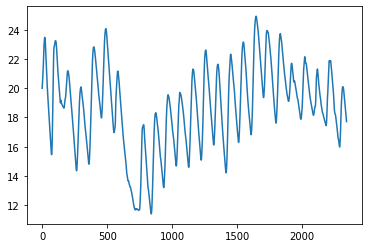

In [36]:
plt.plot(values)

In [37]:
predictor_columns_test=['Meteo_Sun_irradiance','Hour','Outdoor_relative_humidity_Sensor','Meteo_Rain']
test_data=pd.merge(test['Id'],total_data,on='Id')
test_data=test_data[predictor_columns_test]
test_data2=test_data.copy()
#dummy = pd.DataFrame(np.zeros((len(test_data), 1)), columns='Indoor_temperature_room')

In [38]:
test_data=train_data2.append(test_data,ignore_index=True).fillna(0)

In [39]:
temp_mean=train_data2['Indoor_temperature_room'].mean()
temp_std=scaler.scale_[4]

In [40]:
for i in range(len(train_data),len(test_data)):
    x=test_data[i-time_stamps:i]
    x=scaler.transform(x)
    #x=x[:,:-1]
    val=model1.predict(x.reshape(1,time_stamps,x.shape[1]))
    val2=temp_std*val[:,0]+temp_mean
    test_data.loc[i,'Indoor_temperature_room']=val2

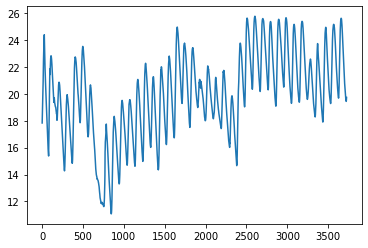

In [41]:
plt.plot(test_data['Indoor_temperature_room'])

In [42]:
final=pd.DataFrame({'Id':test['Id'],'Indoor_temperature_room':np.array(test_data[len(train_data):]['Indoor_temperature_room'])})

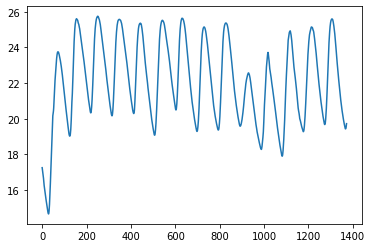

In [43]:
plt.plot(final['Indoor_temperature_room'])

In [44]:
final.to_csv('submission.csv',index=False)

<h1 style='background:#9AB0BD;text-align: center;height:40px; border:4; border-radius: 30px; color:black'>Thanks for reading. If u Like Please upvote:)</h1> 